C:\Users\flare\AppData\Local\Temp\ipykernel_11120\601526800.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp['MA20']  = sp['Close'].rolling(20).mean()
C:\Users\flare\AppData\Local\Temp\ipykernel_11120\601526800.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp['MA50']  = sp['Close'].rolling(50).mean()
C:\Users\flare\AppData\Local\Temp\ipykernel_11120\601526800.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

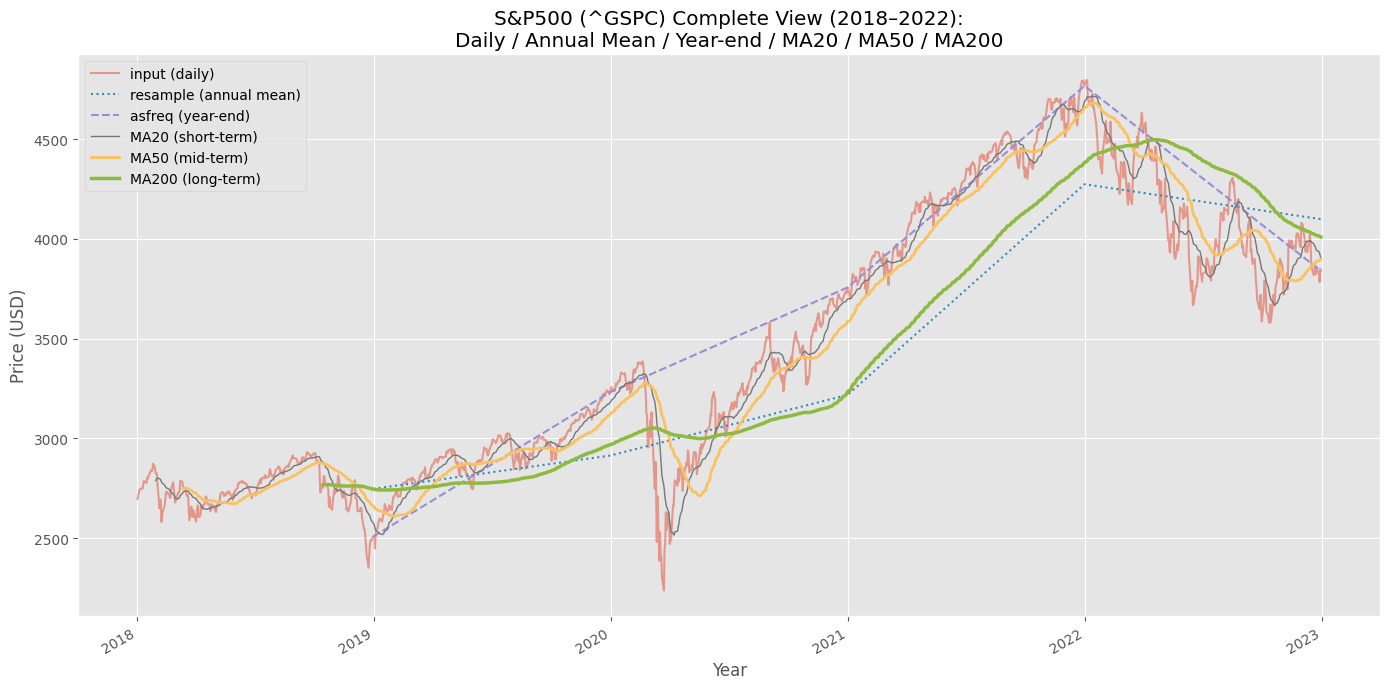

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt

# -----------------------------------------------------------
# 1. S&P500 データ取得
# -----------------------------------------------------------
sp500 = yf.download(
    '^GSPC',
    start='2018-01-01',
    end='2022-12-31',
    auto_adjust=False,
    progress=False
)

sp = sp500.loc[:'2022-12-31']

# -----------------------------------------------------------
# 2. 移動平均の追加（短期・中期・長期）
# -----------------------------------------------------------
sp['MA20']  = sp['Close'].rolling(20).mean()
sp['MA50']  = sp['Close'].rolling(50).mean()
sp['MA200'] = sp['Close'].rolling(200).mean()

# -----------------------------------------------------------
# 3. 図のセットアップ
# -----------------------------------------------------------
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(14, 7))

# -----------------------------------------------------------
# 4. 各データの描画
# -----------------------------------------------------------

# 日次終値
sp['Close'].plot(ax=ax, alpha=0.5, style='-')

# 年次平均（BA）
sp['Close'].resample('BA').mean().plot(ax=ax, style=':')

# 年末営業日値（asfreq）
sp['Close'].asfreq('BA', method='ffill').plot(ax=ax, style='--')

# 移動平均（短期／中期／長期）
sp['MA20'].plot(ax=ax, linewidth=1)
sp['MA50'].plot(ax=ax, linewidth=2)
sp['MA200'].plot(ax=ax, linewidth=2.5)

# -----------------------------------------------------------
# 5. 仕上げ（凡例・タイトルなど）
# -----------------------------------------------------------
ax.legend([
    'input (daily)',
    'resample (annual mean)',
    'asfreq (year-end)',
    'MA20 (short-term)',
    'MA50 (mid-term)',
    'MA200 (long-term)'
])

ax.set_title('S&P500 (^GSPC) Complete View (2018–2022):\n'
             'Daily / Annual Mean / Year-end / MA20 / MA50 / MA200')
ax.set_xlabel('Year')
ax.set_ylabel('Price (USD)')

plt.tight_layout()
plt.show()
